# Download data

Data available via scikit-learn

> https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

In [18]:
from sklearn import datasets

##### classifiction (supervised/descrete) #####
wine_bunch = datasets.load_wine()
print(type(wine_bunch))
print(wine_bunch.keys())
#print(wine_bunch.DESCR)

##### regression (supervised/continuous) #####
reg_bunch = datasets.load_boston()
print(reg_bunch.keys())


##### clustering (unsupervised/descrete) ####
#radmon generated data
# gene expression
##### dimensionality reduction (unuspervised/continuous) #####
#https://idyll.pub/post/dimensionality-reduction-293e465c2a3443e8941b016d/
#gene expression

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


# Pandas overview

In [5]:
import pandas as pd
import numpy as np
wine = pd.DataFrame(wine_bunch.data, columns=wine_bunch.feature_names)
#display(wine)

# # play with these functions #
# print(list(wine))
# print(wine.proline)
# print(wine.iloc[10:20,])
# print(wine.iloc[10:20,['ash','magnesium']])
# print(wine.iloc[10:20,0:3])
# print(wine.loc[10:20,['ash','magnesium']])

wineX is Pandas DataFrame (bacuase we made it a DF earlier)

wineY is ndaray

In [6]:
wineX = wine
wineY = wine_bunch.target

print(wineX.shape,wineY.shape)

(178, 13) (178,)


# Supervised classification

## Test / train split

In [7]:
# random sampling
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wineX, wineY, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(142, 13) (142,)
(36, 13) (36,)


Repeat the split, but in the context of K-fold validation

In [8]:
# k-fold
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=42, shuffle=True)
kf.get_n_splits(wineX)
print(kf)  
for train_index, test_index in kf.split(wineX):
    X_train, X_test = wineX.iloc[train_index], wineX.iloc[test_index]
    y_train, y_test = wineY[train_index], wineY[test_index]
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
# NOTE: wineX is a dataframe, wineY is a ndarra (synatax is different line 7 and 8)

KFold(n_splits=5, random_state=42, shuffle=True)
(142, 13) (142,)
(36, 13) (36,)
(142, 13) (142,)
(36, 13) (36,)
(142, 13) (142,)
(36, 13) (36,)
(143, 13) (143,)
(35, 13) (35,)
(143, 13) (143,)
(35, 13) (35,)


## KNN classification

Visualize the data

In [9]:
# K Nearest Neighbors
import matplotlib.pyplot as plt
print(list(X_train))
plt.scatter(X_train['alcalinity_of_ash'], X_train['total_phenols'],c=y_train)
plt.show()
# CHANGE which features that you are plotting
# Can only visualize on 2 dimensions but algorithm will cluster on all dimensions

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


<Figure size 640x480 with 1 Axes>

In [11]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3, leaf_size=10)
neigh.fit(X_train, y_train) 
print(neigh)
# print(neigh.predict(X_test))
# print(neigh.predict_proba(X_test))
# # TEST SCORE
# print(neigh.score(X_test,y_test))
# # TRAINING SCORE
# print(neigh.score(X_train,y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')


['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


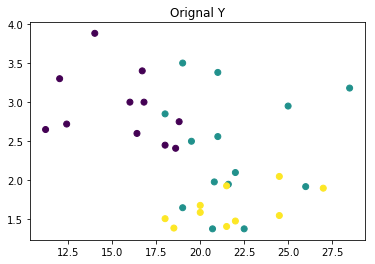

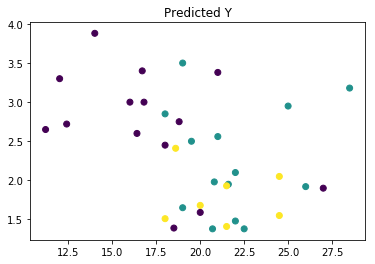

In [12]:
print(list(X_train))
y_pred = neigh.predict(X_test)

#PLOT RESULTS
plt.title("Orignal Y")
plt.scatter(X_test['alcalinity_of_ash'], X_test['total_phenols'],c=y_test)
plt.show()
plt.title("Predicted Y")
plt.scatter(X_test['alcalinity_of_ash'], X_test['total_phenols'],c=y_pred)
plt.show()

Visualizing the results

TRY ON DIFFERENT SPLIT!!

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# class_names = wine_bunch.target_names

# plot_confusion_matrix(y_test, y_pred, classes=class_names,
#                       title='Confusion matrix, without normalization')

# # Plot normalized confusion matrix
# plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
#                       title='Normalized confusion matrix')

### Plotting function
Refernce:

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

In [14]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## Excercise 1 (30minutes)

In [89]:
# 1. Perform K-fold KNN cross validation on the wine data
# 2. Modify KNN hyper parameters and see how it effects the results


# #pseudo code:
# create k-folds
# for each split:
#     train KNN
#     predict for the split
#     see the score

# Supervised regression

## Test / train split

In [19]:
# random sampling
from sklearn import preprocessing
reg_bunch.data = preprocessing.scale(reg_bunch.data)

regX = pd.DataFrame(reg_bunch.data, columns=reg_bunch.feature_names)
regY = reg_bunch.target
# print(bostonX.iloc[0:10])
# print(bostonY[0:10])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(regX, regY, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)




(404, 13) (404,)
(102, 13) (102,)


## Regression

https://scikit-learn.org/stable/modules/linear_model.html

[-0.97149423  0.70155562  0.27675212  0.70653152 -1.99143043  3.11571836
 -0.17706021 -3.04577065  2.28278471 -1.79260468 -1.97995351  1.12649864
 -3.62814937]
Train score:  0.7508856358979672
Test score:  0.668759493535632


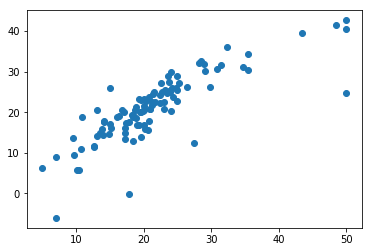

In [20]:
##### linear regression ########
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print(reg.coef_)
y_pred = reg.predict(X_test)
print("Train score: ", reg.score(X_train,y_train))
print("Test score: ", reg.score(X_test,y_test))
plt.scatter(y_test, y_pred)
plt.show()

[-0.84416652  0.46198062 -0.03418626  0.75114482 -1.53723325  3.17316115
 -0.1880602  -2.48151078  1.31849282 -0.97365431 -1.83807721  1.08177436
 -3.40377171]
Train score:  0.7479054361035442
Test score:  0.6635630501366221


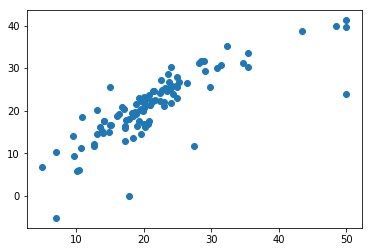

In [32]:
#### RIDGE regression  ######
from sklearn.linear_model import Ridge

def find_alpha():
    # adopted from: https://towardsdatascience.com/ridge-regression-for-better-usage-2f19b3a202db
    ridge_reg = Ridge(alpha=0)
    ridge_reg.fit(X_train, y_train)
    ridge_df = pd.DataFrame({'variable': reg_bunch.feature_names, 'estimate': ridge_reg.coef_})
    ridge_train_pred = []
    ridge_test_pred = []
    # iterate lambdas

    # iterate lambdas
    for alpha in np.arange(0, 200, 1):
        # training
        ridge_reg = Ridge(alpha=alpha)
        ridge_reg.fit(X_train, y_train)
        var_name = 'estimate' + str(alpha)
        ridge_df[var_name] = ridge_reg.coef_
        # prediction
        ridge_train_pred.append(ridge_reg.predict(X_train))
        ridge_test_pred.append(ridge_reg.predict(X_test))

    # organize dataframe
    ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate').rename_axis(1).reset_index()
    # plot betas by lambda
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(ridge_df.RM, 'r', ridge_df.ZN, 'g', ridge_df.RAD, 'b', ridge_df.CRIM, 'c', ridge_df.TAX, 'y')
    ax.axhline(y=0, color='black', linestyle='--')
    ax.set_xlabel("Lambda")
    ax.set_ylabel("Beta Estimate")
    ax.set_title("Ridge Regression Trace", fontsize=16)
    ax.legend(labels=['Room','Residential Zone','Highway Access','Crime Rate','Tax'])
    ax.grid(True)
    plt.show()

# Rooms is the features that has the most significance
#find_alpha()

ridge = Ridge(alpha=20.0)
ridge.fit(X_train, y_train)
print(ridge.coef_)
y_pred = ridge.predict(X_test)
print("Train score: ", ridge.score(X_train,y_train))
print("Test score: ", ridge.score(X_test,y_test))
plt.scatter(y_test, y_pred)
plt.show()

[-0.83796934  0.46704064  0.          0.70483741 -1.74067035  3.16378634
 -0.06698043 -2.67152839  1.42785917 -0.98008334 -1.90529396  1.07252204
 -3.62223499]
Train score:  0.7492259559040106
Test score:  0.6625840465413749


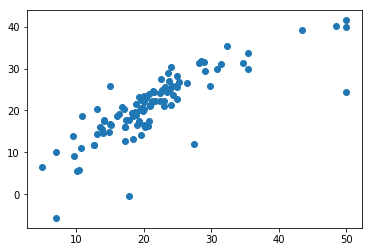

In [35]:
#### LASSO regression  ######
from sklearn import linear_model

def find_alpha():
    ridge_reg = linear_model.Lasso(alpha=0.01)
    ridge_reg.fit(X_train, y_train)
    ridge_df = pd.DataFrame({'variable': reg_bunch.feature_names, 'estimate': ridge_reg.coef_})
    ridge_train_pred = []
    ridge_test_pred = []
    # iterate lambdas

    # iterate lambdas
    for alpha in np.arange(0.1, 1,0.1):
        # training
        ridge_reg = linear_model.Lasso(alpha=alpha)
        ridge_reg.fit(X_train, y_train)
        var_name = 'estimate' + str(alpha)
        ridge_df[var_name] = ridge_reg.coef_
        # prediction
        ridge_train_pred.append(ridge_reg.predict(X_train))
        ridge_test_pred.append(ridge_reg.predict(X_test))

    # organize dataframe
    ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate').rename_axis(1).reset_index()
    # plot betas by lambda
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(ridge_df.RM, 'r', ridge_df.ZN, 'g', ridge_df.RAD, 'b', ridge_df.CRIM, 'c', ridge_df.TAX, 'y')
    ax.axhline(y=0, color='black', linestyle='--')
    ax.set_xlabel("Lambda")
    ax.set_ylabel("Beta Estimate")
    ax.set_title("Lasso Regression Trace", fontsize=16)
    ax.legend(labels=['Room','Residential Zone','Highway Access','Crime Rate','Tax'])
    ax.grid(True)
    plt.show()

#find_alpha()

lasso = linear_model.Lasso(alpha=0.05)
lasso.fit(X_train, y_train)
print(lasso.coef_)
y_pred = lasso.predict(X_test)
print("Train score: ", lasso.score(X_train,y_train))
print("Test score: ", lasso.score(X_test,y_test))
plt.scatter(y_test, y_pred)
plt.show()

LR train:  0.9767790895554215
LR test:  0.3770297714569159
LR RMSE:  3.1986012122242817

Ridge train:  0.9545350496479551
Ridge test:  0.6537684262994671
Ridge RMSE:  2.019245966032022

Lasso train:  0.917867089365298
Lasso test:  0.5547537632599873
Lasso RMSE:  2.592433720110876


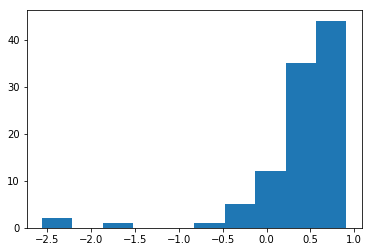

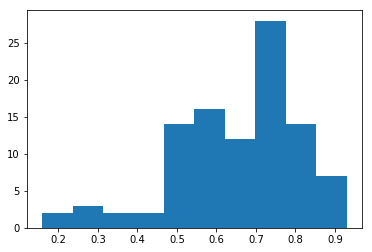

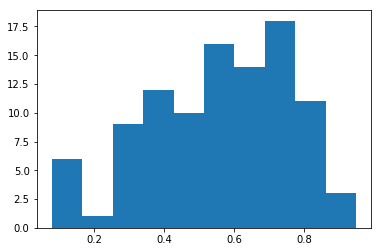

In [56]:
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

np.random.seed(101)

#generate dataset (wide datset)
X = np.random.normal(0,1,size=(50, 30))
# will have 10 some high coefficients 
coef1 = np.random.uniform(0.5,1,10)
# and 20 low coefficeints
coef2 = np.random.uniform(0.0,0.3,20)
coef = np.concatenate((coef1, coef2), axis=0)
# plt.hist(coef)
# plt.show()
y_dot = X.dot(coef)

# generate response data by adding noise 
# why adding noise?
y_response = y_dot + np.random.normal(0,1,50)


lr_train = []
lr_test = []
lr_rmse = []
ridge_train = []
ridge_test = []
ridge_rmse = []
lasso_train = []
lasso_test = []
lasso_rmse = []


for i in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y_response, test_size=0.2)

    ##### linear regression ########
    reg = linear_model.LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    lr_train.append(reg.score(X_train,y_train))
    lr_test.append(reg.score(X_test,y_test))
    lr_rmse.append(mean_squared_error(y_test, y_pred))


    #### RIDGE regression  ######
    ridge = Ridge(alpha=5.0)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    ridge_train.append(ridge.score(X_train,y_train))
    ridge_test.append(ridge.score(X_test,y_test))
    ridge_rmse.append(mean_squared_error(y_test, y_pred))

    
    #### LASSO regression  ######
    lasso = linear_model.Lasso(alpha=0.1)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    lasso_train.append(lasso.score(X_train,y_train))
    lasso_test.append(lasso.score(X_test,y_test))
    lasso_rmse.append(mean_squared_error(y_test, y_pred))

    
    
print('LR train: ',sum(lr_train)/len(lr_train))
print('LR test: ',sum(lr_test)/len(lr_test))
print('LR RMSE: ',sum(lr_rmse)/len(lr_rmse))
print("")
print('Ridge train: ',sum(ridge_train)/len(ridge_train))
print('Ridge test: ',sum(ridge_test)/len(ridge_test))
print('Ridge RMSE: ',sum(ridge_rmse)/len(ridge_rmse))
print("")
print('Lasso train: ',sum(lasso_train)/len(lasso_train))
print('Lasso test: ',sum(lasso_test)/len(lasso_test))
print('Lasso RMSE: ',sum(lasso_rmse)/len(lasso_rmse))



#examine variance and bias
plt.hist(lr_test)
plt.show()
plt.hist(ridge_test)
plt.show()
plt.hist(lasso_test)
plt.show()


# ORANGE

Use the script below

https://www.youtube.com/playlist?list=PLmNPvQr9Tf-ZSDLwOzxpvY-HrE0yv-8Fy&disable_polymer=true

In [ ]:
import numpy as np
from Orange.data import Domain, Table

#generate dataset (wide datset)
X = np.random.normal(0,1,size=(50, 30))
# will have 10 some high coefficients 
coef1 = np.random.uniform(0.5,1,10)
# and 20 low coefficeints
coef2 = np.random.uniform(0.0,0.3,20)
coef = np.concatenate((coef1, coef2), axis=0)
# plt.hist(coef)
# plt.show()
y_dot = X.dot(coef)
y_response = y_dot + np.random.normal(0,1,50)

y_response = y_response.reshape((y_response.shape[0],1))
all_data = np.append(X, y_response, 1)
out_data = Table(all_data)

## Excersices

1. Add seed to both Jupyter code and to ORANGE code: np.random.seed(101)

2. Why are the results not the same?

3. Try generating larger data set (50, 30) -> (500, 30). What happens?

## Regression Lab
![alt text](orangeReg.png "Workflow")

<b>Data</b>: /data/dow_jones_index/dow_jones_index2.csv

<b>Goal</b>: predict closing price for the last 3 days for each stock. Date is represented as numeric value here, so you need to predict for date > 40700

## Classification Lab
![alt text](orangeClass.png "Workflow")

<b>Data</b>: /data/titanic.csv

<b>Goal</b>: Randomly split into train and test and predict "survived" variable